# Lab 3: Compass Heading

## Reading the Raw Magnetometer Values

In [1]:
%matplotlib notebook

import board
import adafruit_bno055

import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

i2c = board.I2C()
imu = adafruit_bno055.BNO055_I2C(i2c)
imu.mode = adafruit_bno055.MAGONLY_MODE

window = 100
interval = 1/20

x_raw = []
y_raw = []
z_raw = []
h = []
t = []

<IPython.core.display.Javascript object>


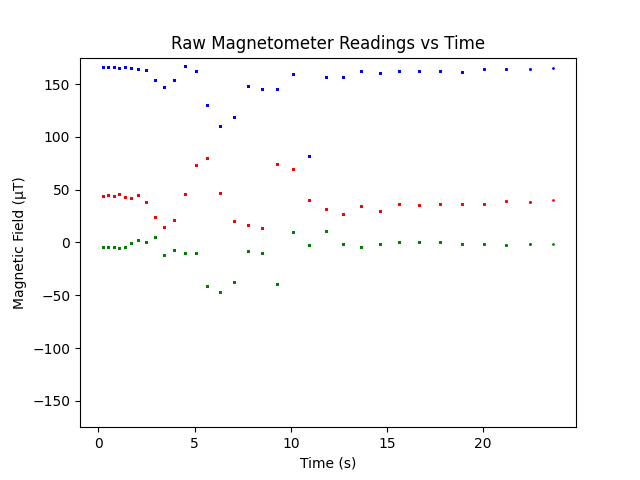

In [2]:
fig, ax = plt.subplots()

plt.title("Raw Magnetometer Readings vs Time")
plt.xlabel("Time (s)")
plt.ylabel("Magnetic Field (μT)")
plt.ylim(-175,175)

def animate(i):
    
    x, y, z = imu.magnetic

    x_raw.append(x)
    y_raw.append(y)
    z_raw.append(z)

    t.append(time.monotonic()-start_time)
    
    plt.scatter(t, x_raw, s=1, color='r')
    plt.scatter(t, y_raw, s=1, color='g')
    plt.scatter(t, z_raw, s=1, color='b')

start_time = time.monotonic()

x_raw.clear()
y_raw.clear()
z_raw.clear()

ani = animation.FuncAnimation(fig, animate, interval=100)
plt.show()

## Using Magnetometer Readings To Get A Compass Heading

<IPython.core.display.Javascript object>


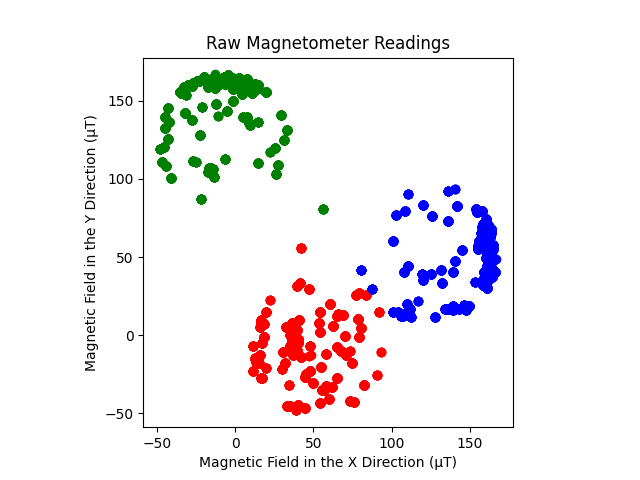

In [3]:
x_raw.clear()
y_raw.clear()
z_raw.clear()
t.clear()

fig, ax = plt.subplots()
ax.set_aspect(1)

# plt.xlim(-60, 60)
# plt.ylim(-60, 60)

plt.title("Raw Magnetometer Readings")
plt.xlabel("Magnetic Field in the X Direction (μT)")
plt.ylabel("Magnetic Field in the Y Direction (μT)")

def animate(i):
    
    x, y, z = imu.magnetic

    if abs(x) < 500 or abs(y) < 500 or abs(z) < 500:
        x_raw.append(x)
        y_raw.append(y)
        z_raw.append(z)

    plt.scatter(x_raw, y_raw, color='r')
    plt.scatter(y_raw, z_raw, color='g')
    plt.scatter(z_raw, x_raw, color='b')

    plt.pause(interval)
    
ani = animation.FuncAnimation(fig, animate, interval=100)
plt.show()

## Calibrate the Magnetometer

X range:  11.375 93.5
Y range:  -48.0625 56.0625
Z range:  80.6875 166.75
Final calibration in uTesla: [52.4375, 4.0, 123.71875]


<IPython.core.display.Javascript object>


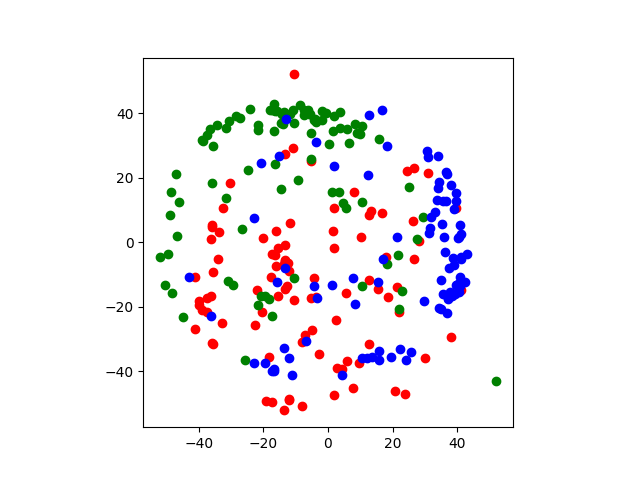

In [4]:
x_min = min(x_raw)
x_max = max(x_raw)
y_min = min(y_raw)
y_max = max(y_raw)
z_min = min(z_raw)
z_max = max(z_raw)

print("X range: ", x_min, x_max)
print("Y range: ", y_min, y_max)
print("Z range: ", z_min, z_max)

mag_calibration = [ (x_max + x_min) / 2, (y_max + y_min) / 2, (z_max + z_min) / 2]
print("Final calibration in uTesla:", mag_calibration)

cal_mag_x = [x - mag_calibration[0] for x in x_raw]
cal_mag_y = [y - mag_calibration[1] for y in y_raw]
cal_mag_z = [z - mag_calibration[2] for z in z_raw]

fig, ax = plt.subplots(1, 1)
ax.set_aspect(1)

# Clear all axis
ax.cla()

# Display the now calibrated data
ax.scatter(cal_mag_x, cal_mag_y, color='r')
ax.scatter(cal_mag_y, cal_mag_z, color='g')
ax.scatter(cal_mag_z, cal_mag_x, color='b')
fig.show()

<IPython.core.display.Javascript object>


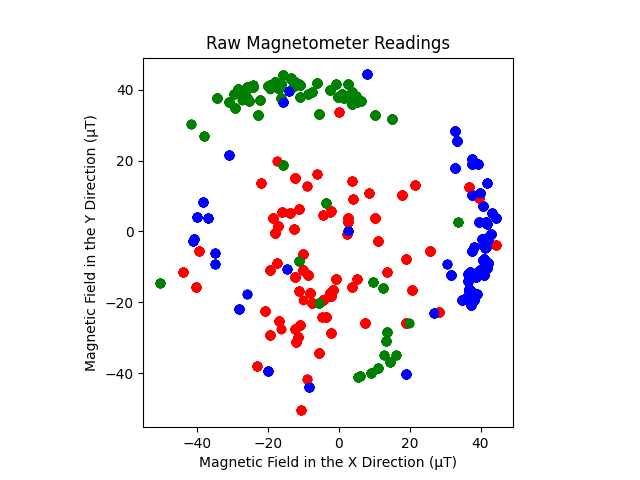

In [5]:
x_raw.clear()
y_raw.clear()
z_raw.clear()
t.clear()

fig, ax = plt.subplots()
ax.set_aspect(1)

plt.title("Raw Magnetometer Readings")
plt.xlabel("Magnetic Field in the X Direction (μT)")
plt.ylabel("Magnetic Field in the Y Direction (μT)")

def animate(i):
    
    x, y, z = imu.magnetic

    x -= mag_calibration[0]
    y -= mag_calibration[1]
    z -= mag_calibration[2]

    if abs(x) < 500 or abs(y) < 500 or abs(z) < 500:
        x_raw.append(x)
        y_raw.append(y)
        z_raw.append(z)

    plt.scatter(x_raw, y_raw, color='r')
    plt.scatter(y_raw, z_raw, color='g')
    plt.scatter(z_raw, x_raw, color='b')

    plt.pause(interval)
    
ani = animation.FuncAnimation(fig, animate, interval=100)
plt.show()

### Calculate A Compass Heading

<IPython.core.display.Javascript object>


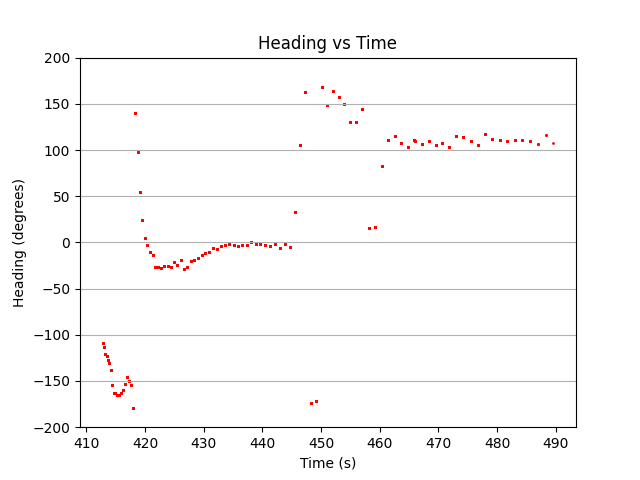

In [6]:
fig, ax1 = plt.subplots()

plt.title("Heading vs Time")
plt.xlabel("Time (s)")
plt.ylabel("Heading (degrees)")
plt.grid(axis = 'y')

declination_angle = 7

plt.ylim(-200, 200)

x_raw.clear()
y_raw.clear()
t.clear()

def animate(i):
    
    x, y, z = imu.magnetic

    x -= mag_calibration[0]
    y -= mag_calibration[1]
    z -= mag_calibration[2]
        
    t.append(time.monotonic()-start_time)
    
    heading = np.arctan2(y,x)
    h.append(np.degrees(heading)-declination_angle)
    
    plt.scatter(t, h, s=1, color='r')
    
ani = animation.FuncAnimation(fig, animate, interval=100)
plt.show()